# Extracting electronic entropy
* electronic entropy may play an important role at high temperatures (especially at low pressure)
* The electronic contribution can only be constrained by first principles electronic calculations
* We derive the electronic model from deKoker et al. 2009, refitting the model presented there to the electronic entropy data in Figure 3a.
* This fitted model can then fully reproduce the electonic contributions in deKoker 2009.

In [1]:
import numpy as np
import pandas as pd
import pickle
from scipy import optimize

import matplotlib.pyplot as plt
%matplotlib notebook


import xmeos
from xmeos import models
from xmeos import datamod
CONSTS = models.CONSTS
import copy


kboltz = CONSTS['kboltz']

In [2]:
analysis_file = 'data/analysis.pkl'
try:
    with open(analysis_file, 'rb') as f:
        analysis = pickle.load(f)
except:
    analysis = {}

In [3]:
dat = pd.read_csv('data/MgSiO3-electron-entropy-deKoker2009.csv')

In [4]:
eos_mod = models.ElectronicEos(kind='CvPowLaw')
eos_mod.entropy(50,8000)/xmeos.models.CONSTS['kboltz']

eos_mod.set_param_values(param_names=['V0', 'Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp' ],
                        param_values=[12.97, 3000, -.3, 2.7e-4,+.6])
param0 = eos_mod.get_param_values(param_names=['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp'])
V0, = eos_mod.get_param_values(param_names=['V0']) 

Vfrac = np.linspace(.35,1.25,1001)
Vmod = V0*Vfrac

<IPython.core.display.Javascript object>


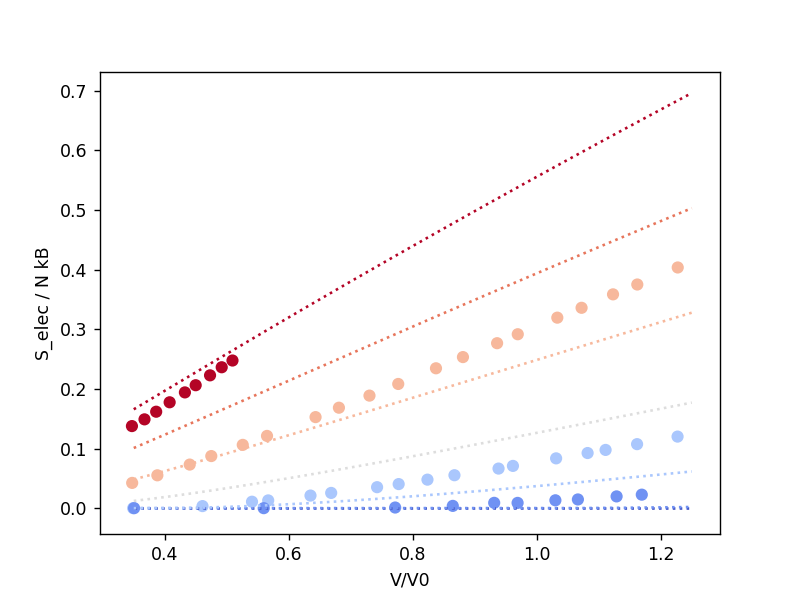

In [5]:
# Initial fit by hand

plt.figure()


T0_ref = 4000

cmap = plt.get_cmap('coolwarm',7)
plt.scatter(dat['Vratio'],dat['S'],c=dat['T'],cmap=cmap)


Tmod = [2000,3000,4000,5000,6000,7000,8000]

for T in Tmod:
    plt.plot(Vfrac, eos_mod.entropy(Vmod,T)/kboltz,':',
             color=cmap((T-2000)/(8000-2000)))
    
# plt.colorbar()
plt.clim(1500,8500)
plt.xlabel('V/V0')
plt.ylabel('S_elec / N kB')

<IPython.core.display.Javascript object>


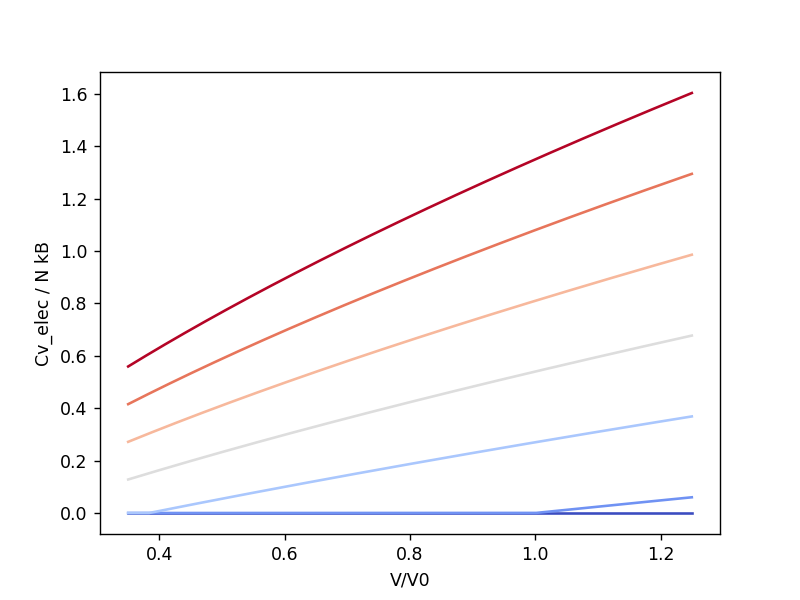

In [6]:
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.heat_capacity(Vmod,T)/kboltz,'-',
             color=cmap((T-2000)/(8000-2000)))
    
    

plt.xlabel('V/V0')
plt.ylabel('Cv_elec / N kB')

In [7]:
def resid_S_elec(param, Vratio=dat['Vratio'], T=dat['T'], S=dat['S'], eos_mod=eos_mod):

    param_names = ['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp']
    eos_mod.set_param_values(param_names=param_names, param_values=param)
    V0, = eos_mod.get_param_values(param_names=['V0']) 
    V = Vratio*V0
    
    Smodel = eos_mod.entropy(V, T)/kboltz
    resid_S = Smodel-S
    
    return resid_S

In [8]:
results = optimize.leastsq(resid_S_elec,param0)
paramf = results[0]
param_names = ['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp']
eos_mod.set_param_values(param_names=param_names, param_values=paramf)

print(param_names)
print(paramf)


['Tel0', 'TelExp', 'CvelFac0', 'CvelFacExp']
[ 2.46659883e+03 -4.57801641e-01  2.27133196e-04  6.77736044e-01]


In [9]:
# Store data for later use
analysis['eos_electronic'] = eos_mod
analysis['electronic_param_names'] = param_names
analysis['electronic_param_values'] = paramf

 
with open(analysis_file, 'wb') as f:
    pickle.dump(analysis, f)

<IPython.core.display.Javascript object>


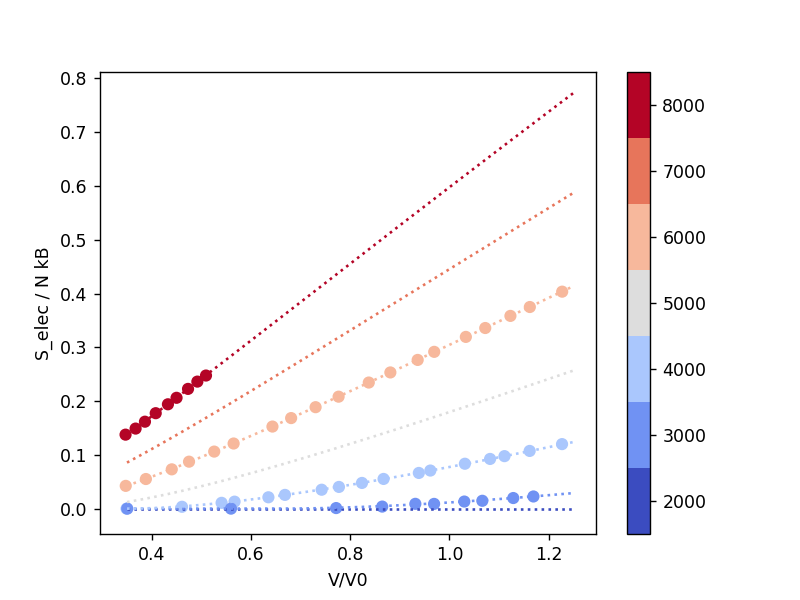

In [10]:

plt.figure()

plt.scatter(dat['Vratio'],dat['S'],c=dat['T'],cmap=cmap)

Tmod = [2000,3000,4000,5000,6000,7000,8000]

for T in Tmod:
    plt.plot(Vfrac, eos_mod.entropy(Vmod,T)/kboltz,':',
             color=cmap((T-2000)/(8000-2000)))

plt.colorbar()
plt.clim(1500,8500)
plt.xlabel('V/V0')
plt.ylabel('S_elec / N kB')

<IPython.core.display.Javascript object>


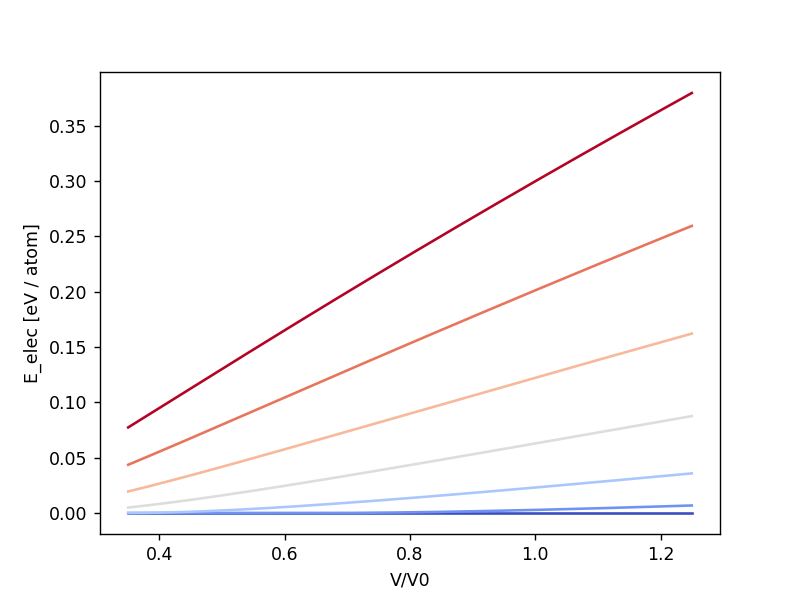

In [11]:
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.energy(Vmod,T),'-',
             color=cmap((T-2000)/(8000-2000)))


plt.xlabel('V/V0')
plt.ylabel('E_elec [eV / atom]')

<IPython.core.display.Javascript object>


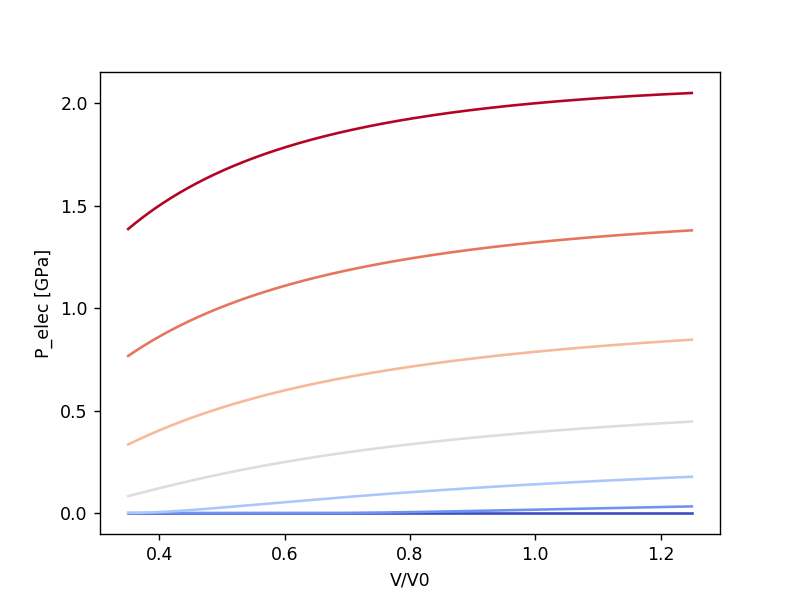

In [12]:
V0, = eos_mod.get_param_values(param_names=['V0'])
plt.figure()

for T in Tmod:
    plt.plot(Vfrac, eos_mod.press(Vfrac*V0,T),'-',
             color=cmap((T-2000)/(8000-2000)))
    
plt.xlabel('V/V0')
plt.ylabel('P_elec [GPa]')